# Import Library

In [81]:
import pandas as pd
import numpy as np

# Import Data

In [82]:
df_idx = pd.read_pickle('../dataset/preprocessing/df_idx_clean.pkl')
df_nyse = pd.read_pickle('../dataset/preprocessing/df_nyse_clean.pkl')
df_kurs = pd.read_pickle('../dataset/preprocessing/df_kurs_clean.pkl')
df_sb = pd.read_pickle('../dataset/preprocessing/df_sb_clean.pkl')

# Log Return

## IDX30

In [83]:
df_idx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1422 non-null   datetime64[ns]
 1   priceidx  1422 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.3 KB


In [84]:
df_idx.head(5)

,date,priceidx
0,2025-11-19,442.67
1,2025-11-18,440.24
2,2025-11-17,444.68
3,2025-11-14,443.13
4,2025-11-13,441.25


In [85]:
df_idx = df_idx.sort_values(by='date', ascending=True).reset_index(drop=True) #urutkan data dan reset indeks data

df_idx['logreturn_idx'] = np.log(df_idx['priceidx'])-np.log(df_idx['priceidx'].shift(1)) #hitung log return dari price

df_idx = df_idx.dropna(subset = ['logreturn_idx']) #drop kolom with null value
df_idx.head(5)

,date,priceidx,logreturn_idx
1,2020-01-03,557.65,0.009459
2,2020-01-06,551.66,-0.010800
3,2020-01-07,554.00,0.004233
4,2020-01-08,549.01,-0.009048
5,2020-01-09,555.10,0.011032


## NYSE

In [86]:
df_nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1479 non-null   datetime64[ns]
 1   pricenyse  1479 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.2 KB


In [87]:
df_nyse.head(5)

,date,pricenyse
0,2020-01-02,14002.490234
1,2020-01-03,13917.049805
2,2020-01-06,13941.799805
3,2020-01-07,13898.450195
4,2020-01-08,13934.440430


In [88]:
df_nyse['logreturn_nyse'] = np.log(df_nyse['pricenyse']) - np.log(df_nyse['pricenyse'].shift(1))

df_nyse = df_nyse.dropna(subset=['logreturn_nyse'])
df_nyse.head(5)

,date,pricenyse,logreturn_nyse
1,2020-01-03,13917.049805,-0.006120
2,2020-01-06,13941.799805,0.001777
3,2020-01-07,13898.450195,-0.003114
4,2020-01-08,13934.440430,0.002586
5,2020-01-09,13997.650391,0.004526


## Kurs

In [89]:
df_kurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1481 non-null   datetime64[ns]
 1   usdidr  1481 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.3 KB


In [90]:
df_kurs.head(5)

,date,usdidr
0,2025-11-19,16716.6
1,2025-11-18,16728.3
2,2025-11-17,16725.0
3,2025-11-14,16694.0
4,2025-11-13,16725.0


In [91]:
df_kurs = df_kurs.sort_values(by='date', ascending=True).reset_index(drop=True) #urutkan data dari terlama ke terbaru

df_kurs['logreturn_usdidr'] = np.log(df_kurs['usdidr']) - np.log(df_kurs['usdidr'].shift(1)) #menghitung log return dari harga kurs

df_kurs = df_kurs.dropna(subset=['logreturn_usdidr'])
df_kurs.head(5)

,date,usdidr,logreturn_usdidr
1,2020-01-02,13889.0,0.000468
2,2020-01-03,13925.0,0.002589
3,2020-01-06,13940.0,0.001077
4,2020-01-07,13875.0,-0.004674
5,2020-01-08,13892.5,0.001260


# Differencing

## Suku Bunga

In [92]:
df_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        71 non-null     datetime64[ns]
 1   suku_bunga  71 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [93]:
df_sb.head(5)

,date,suku_bunga
0,2025-11-19,4.75
1,2025-10-22,4.75
2,2025-09-17,4.75
3,2025-08-20,5.00
4,2025-07-16,5.25


In [94]:
df_sb = df_sb.sort_values(by='date').reset_index(drop=True) #urutkan data dari yang terlama ke terbaru

df_sb['diffsukubunga'] = df_sb['suku_bunga'].diff() #differencing tiap nilai di suku bunga

df_sb = df_sb.dropna(subset=['diffsukubunga']) #hapus baris yang mengandung nan pada kolom diffsukubunga
df_sb.head(5)

,date,suku_bunga,diffsukubunga
1,2020-02-20,4.75,-0.25
2,2020-03-19,4.50,-0.25
3,2020-04-14,4.50,0.00
4,2020-05-19,4.50,0.00
5,2020-06-18,4.25,-0.25


# Merge Data

In [95]:
df = df_idx.merge(df_nyse, on='date', how='left').merge(df_kurs, on='date', how='left').merge(df_sb, on='date', how='left')
df.head(5)

,date,priceidx,logreturn_idx,pricenyse,logreturn_nyse,usdidr,logreturn_usdidr,suku_bunga,diffsukubunga
0,2020-01-03,557.65,0.009459,13917.049805,-0.006120,13925.0,0.002589,NaN,NaN
1,2020-01-06,551.66,-0.010800,13941.799805,0.001777,13940.0,0.001077,NaN,NaN
2,2020-01-07,554.00,0.004233,13898.450195,-0.003114,13875.0,-0.004674,NaN,NaN
3,2020-01-08,549.01,-0.009048,13934.440430,0.002586,13892.5,0.001260,NaN,NaN
4,2020-01-09,555.10,0.011032,13997.650391,0.004526,13850.0,-0.003064,NaN,NaN


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1421 non-null   datetime64[ns]
 1   priceidx          1421 non-null   float64       
 2   logreturn_idx     1421 non-null   float64       
 3   pricenyse         1378 non-null   float64       
 4   logreturn_nyse    1378 non-null   float64       
 5   usdidr            1421 non-null   float64       
 6   logreturn_usdidr  1421 non-null   float64       
 7   suku_bunga        70 non-null     float64       
 8   diffsukubunga     70 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 100.0 KB


In [111]:
# imputasi missing value dengan menggunakan forward fill
df['pricenyse'] = df['pricenyse'].fillna(method='ffill')
df['suku_bunga'] = df['suku_bunga'].fillna(method='ffill')

#imputasi return
df['logreturn_nyse'] = df['logreturn_nyse'].fillna(0)
df['diffsukubunga'] = df['diffsukubunga'].fillna(0)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1421 non-null   datetime64[ns]
 1   priceidx          1421 non-null   float64       
 2   logreturn_idx     1421 non-null   float64       
 3   pricenyse         1421 non-null   float64       
 4   logreturn_nyse    1421 non-null   float64       
 5   usdidr            1421 non-null   float64       
 6   logreturn_usdidr  1421 non-null   float64       
 7   suku_bunga        1387 non-null   float64       
 8   diffsukubunga     1421 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 100.0 KB


C:\Users\Acer\AppData\Local\Temp\ipykernel_5288\3544230411.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pricenyse'] = df['pricenyse'].fillna(method='ffill')
C:\Users\Acer\AppData\Local\Temp\ipykernel_5288\3544230411.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['suku_bunga'] = df['suku_bunga'].fillna(method='ffill')


In [112]:
df['suku_bunga'] = df['suku_bunga'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1421 non-null   datetime64[ns]
 1   priceidx          1421 non-null   float64       
 2   logreturn_idx     1421 non-null   float64       
 3   pricenyse         1421 non-null   float64       
 4   logreturn_nyse    1421 non-null   float64       
 5   usdidr            1421 non-null   float64       
 6   logreturn_usdidr  1421 non-null   float64       
 7   suku_bunga        1421 non-null   float64       
 8   diffsukubunga     1421 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 100.0 KB


In [114]:
path = '../dataset/feature engineering/clean_data.pkl'
df.to_pickle(path)
print(f'Data sudah disimpan di {path}')

Data sudah disimpan di ../dataset/feature engineering/clean_data.pkl


# Hide

In [37]:
df = pd.read_pickle("clean_data.pkl")
df.head()

,priceidx,logreturn_IDX30,pricenyse,logreturn_NYSE,USDIDR,logreturn_USDIDR,suku_bunga,change_suku_bunga
date,,,,,,,,
2020-01-23,560.12,-0.000678,14102.040039,-0.000581,13630.0,0.004228,5.0,0.052632
2020-01-24,560.50,0.019711,13978.469727,-0.008801,13572.5,-0.002392,5.0,0.052632
2020-01-27,549.56,0.003262,13769.599609,-0.015055,13605.0,-0.002386,5.0,0.052632
2020-01-28,547.77,-0.000091,13877.610352,0.007814,13637.5,0.000734,5.0,0.052632
2020-01-29,547.82,0.012306,13843.809570,-0.002439,13627.5,-0.001283,5.0,0.052632


In [38]:
df.describe()

,priceidx,logreturn_IDX30,pricenyse,logreturn_NYSE,USDIDR,logreturn_USDIDR,suku_bunga,change_suku_bunga
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,472.764769,0.000163,16391.752764,0.000368,15179.307036,-0.000153,4.812722,0.000861
std,46.651849,0.013869,2536.939022,0.012421,820.975535,0.004025,1.046493,0.034471
min,311.880000,-0.142235,8777.379883,-0.125950,13572.500000,-0.044659,3.500000,-0.117647
25%,440.105000,-0.005980,14990.989746,-0.004828,14402.500000,-0.001898,3.500000,0.000000
50%,483.380000,-0.000085,16184.500000,0.000696,15085.000000,0.000000,4.750000,0.000000
75%,503.850000,0.007023,18047.040039,0.006060,15820.000000,0.001349,5.750000,0.000000
max,583.110000,0.092473,21807.330078,0.095642,16870.000000,0.027844,6.250000,0.071429


In [39]:
df.duplicated().sum()

0

                   priceidx  logreturn_IDX30  pricenyse  logreturn_NYSE  \
priceidx           1.000000         0.055729  -0.275276       -0.048602   
logreturn_IDX30    0.055729         1.000000  -0.009340       -0.195415   
pricenyse         -0.275276        -0.009340   1.000000        0.019107   
logreturn_NYSE    -0.048602        -0.195415   0.019107        1.000000   
USDIDR            -0.507412        -0.003869   0.555888        0.017231   
logreturn_USDIDR  -0.080765        -0.251289   0.016149        0.284505   
suku_bunga        -0.304237         0.016494   0.362768        0.014477   
change_suku_bunga -0.389817        -0.020958   0.086112        0.028894   

                     USDIDR  logreturn_USDIDR  suku_bunga  change_suku_bunga  
priceidx          -0.507412         -0.080765   -0.304237          -0.389817  
logreturn_IDX30   -0.003869         -0.251289    0.016494          -0.020958  
pricenyse          0.555888          0.016149    0.362768           0.086112  
logretur

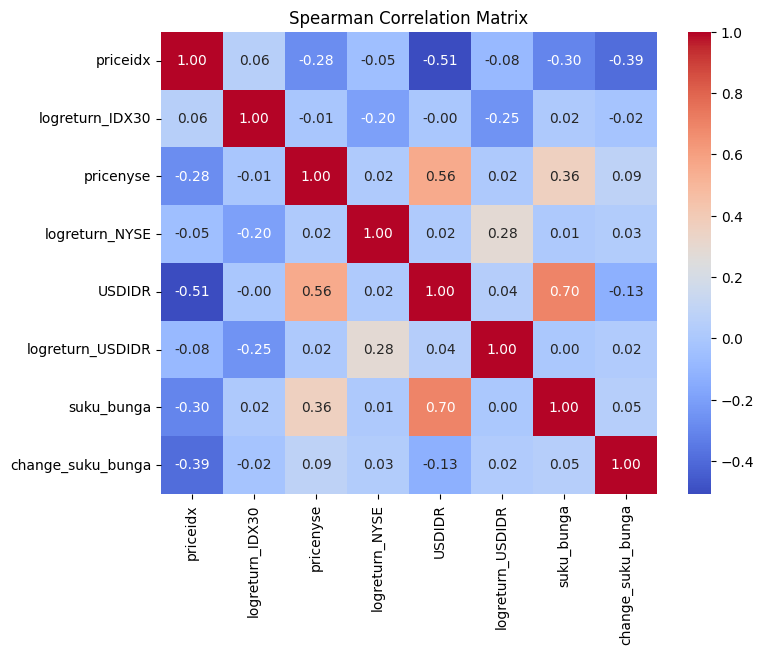

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi Spearman
corr_spearman = df.corr(method='spearman')

# Tampilkan matrix korelasi
print(corr_spearman)

plt.figure(figsize=(8,6))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(series, name):
    series = series.dropna()
    stat, pval, lags, nobs, *_ = adfuller(series, autolag='AIC')

    return {
        'Variabel': name,
        'ADF Statistic': round(stat, 3),
        'p-value': f"{pval:.3f}",
        'Lags Used': lags,
        'N Obs': nobs,
        'Stasioner (5%)': 'Ya' if pval < 0.05 else 'Tidak'
    }

adf_results = []

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    adf_results.append(adf_test(df[col], col))

adf_df = pd.DataFrame(adf_results)
adf_df

,Variabel,ADF Statistic,p-value,Lags Used,N Obs,Stasioner (5%)
0,priceidx,-2.710,0.072,16,1390,Tidak
1,logreturn_IDX30,-8.333,0.000,18,1388,Ya
2,pricenyse,-0.714,0.843,4,1402,Tidak
3,logreturn_NYSE,-9.741,0.000,12,1394,Ya
4,USDIDR,-1.971,0.299,4,1402,Tidak
5,logreturn_USDIDR,-15.561,0.000,3,1403,Ya
6,suku_bunga,-1.063,0.730,22,1384,Tidak
7,change_suku_bunga,-3.850,0.002,0,1406,Ya


In [42]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

returns = df['logreturn_IDX30'] * 100  # kalikan return dengan 100 agar lebih mudah dibaca (%)

# Tampilkan 5 return pertama
print("=== 5 Return IDX30 Pertama ===")
print(returns.head())

p = [1,2,3]
q = [1,2,3]

results = []

for i in p:
    for j in q:
        model = arch_model(
            returns,
            vol='Garch',
            p=i,
            q=j,
            mean='Zero',
            dist='normal'
        )
        res = model.fit(disp='off')

        results.append({
            'Model': f'GARCH({i},{j})',
            'p': i,
            'q': j,
            'AIC': res.aic,
            'BIC': res.bic,
            'LogLik': res.loglikelihood
        })

eval_df = pd.DataFrame(results)
eval_df = eval_df.sort_values('AIC').reset_index(drop=True)

eval_df

=== 5 Return IDX30 Pertama ===
date
2020-01-23   -0.067820
2020-01-24    1.971128
2020-01-27    0.326247
2020-01-28   -0.009128
2020-01-29    1.230570
Name: logreturn_IDX30, dtype: float64


,Model,p,q,AIC,BIC,LogLik
0,"GARCH(1,1)",1,1,4369.714649,4385.462294,-2181.857325
1,"GARCH(1,2)",1,2,4371.410522,4392.407383,-2181.705261
2,"GARCH(2,1)",2,1,4371.714649,4392.711509,-2181.857325
3,"GARCH(1,3)",1,3,4371.834382,4398.080457,-2180.917191
4,"GARCH(2,2)",2,2,4373.666636,4399.912711,-2181.833318
5,"GARCH(3,1)",3,1,4373.714649,4399.960724,-2181.857325
6,"GARCH(2,3)",2,3,4373.764279,4405.259570,-2180.882140
7,"GARCH(3,3)",3,3,4375.635759,4412.380264,-2180.817880
8,"GARCH(3,2)",3,2,4375.666635,4407.161925,-2181.833317


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1407 entries, 2020-01-23 to 2025-11-19
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   priceidx           1407 non-null   float64
 1   logreturn_IDX30    1407 non-null   float64
 2   pricenyse          1407 non-null   float64
 3   logreturn_NYSE     1407 non-null   float64
 4   USDIDR             1407 non-null   float64
 5   logreturn_USDIDR   1407 non-null   float64
 6   suku_bunga         1407 non-null   float64
 7   change_suku_bunga  1407 non-null   float64
dtypes: float64(8)
memory usage: 98.9 KB


In [44]:
df_vol = df[['logreturn_IDX30', 'logreturn_NYSE', 'logreturn_USDIDR', 'change_suku_bunga']].copy()
df_vol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1407 entries, 2020-01-23 to 2025-11-19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   logreturn_IDX30    1407 non-null   float64
 1   logreturn_NYSE     1407 non-null   float64
 2   logreturn_USDIDR   1407 non-null   float64
 3   change_suku_bunga  1407 non-null   float64
dtypes: float64(4)
memory usage: 55.0 KB


In [47]:
from arch import arch_model
import pandas as pd
from statsmodels.stats.diagnostic import het_arch

# =========================
# 1. Data return IDX30
# =========================
returns = (df['logreturn_IDX30'] * 100).dropna()

# =========================
# 2. Fit GARCH(1,1)
# =========================
garch_11 = arch_model(
    returns,
    vol='Garch',
    p=1,
    q=1,
    mean='Zero',
    dist='normal'
)

res = garch_11.fit(disp='off')

print(res.summary())

# =========================
# 3. Ambil conditional variance
# =========================
cond_vol = res.conditional_volatility
cond_vol.name = 'cond_vol_garch_11'

# =========================
# 4. Gabungkan ke df_vol
# =========================
df_vol = df[['logreturn_IDX30',
             'logreturn_NYSE',
             'logreturn_USDIDR',
             'change_suku_bunga']].copy()

df_vol = df_vol.join(cond_vol, how='left')


# uji arch-lm
std_resid = res.std_resid

arch_lm = het_arch(std_resid,nlags=10)
print('uji arch-lm')
print(f"lm statistic : {arch_lm[0]:.4f}")
print(f"lm p-value : {arch_lm[1]:.4f}")
print(f"F Statistic : {arch_lm[2]:.4f}")
print(f"F p-value : {arch_lm[3]:.4f}")

# =========================
# 5. Cek hasil
# =========================
df_vol.info()
df_vol.head()

                       Zero Mean - GARCH Model Results                        
Dep. Variable:        logreturn_IDX30   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -2181.86
Distribution:                  Normal   AIC:                           4369.71
Method:            Maximum Likelihood   BIC:                           4385.46
                                        No. Observations:                 1407
Date:                Mon, Dec 22 2025   Df Residuals:                     1407
Time:                        18:53:51   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0751  4.818e-02      1.558      0.119 [-1.93

,logreturn_IDX30,logreturn_NYSE,logreturn_USDIDR,change_suku_bunga,cond_vol_garch_11
date,,,,,
2020-01-23,-0.000678,-0.000581,0.004228,0.052632,2.264644
2020-01-24,0.019711,-0.008801,-0.002392,0.052632,2.016964
2020-01-27,0.003262,-0.015055,-0.002386,0.052632,1.990172
2020-01-28,-0.000091,0.007814,0.000734,0.052632,1.782675
2020-01-29,0.012306,-0.002439,-0.001283,0.052632,1.596514


In [24]:
df_vol.isna().sum()

logreturn_IDX30      0
logreturn_NYSE       0
logreturn_USDIDR     0
change_suku_bunga    0
cond_vol_garch_11    0
dtype: int64

In [25]:
df_vol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1407 entries, 2020-01-23 to 2025-11-19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   logreturn_IDX30    1407 non-null   float64
 1   logreturn_NYSE     1407 non-null   float64
 2   logreturn_USDIDR   1407 non-null   float64
 3   change_suku_bunga  1407 non-null   float64
 4   cond_vol_garch_11  1407 non-null   float64
dtypes: float64(5)
memory usage: 66.0 KB


In [48]:
df_vol.to_pickle('clean_FE_dataset.pkl')